In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations, product

import scipy

In [2]:
def horner(poly, x0):
    out, n = poly[0], len(poly)
    for i in range(1,n):
        out = x0*out + poly[i]
    return out

def estrin(poly, x0):
    pass

horner([2, 3, -4, 1], 8)

1185

In [3]:
def gauss(m, s, N=500):
    x = np.arange(N, dtype=np.float64)
    h = np.exp(-(x-m)**2 / (2*s**2))
    return h/h.sum()

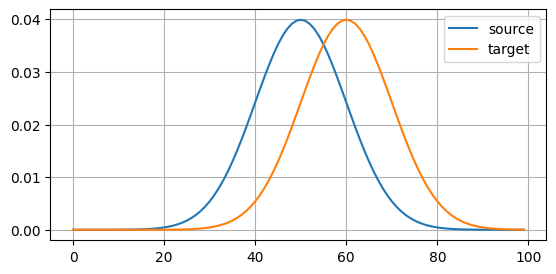

In [4]:
N, h = 100, 1
x = np.arange(0, N, h)
u = gauss(50, 10, N)
v = gauss(60, 10, N)

C = np.array([
    abs(i-j) for i,j in product(range(N), repeat=2)
]).reshape(N,N)

plt.figure(1, figsize=(6.4, 3))
plt.plot(u, label="source")
plt.plot(v, label="target")
plt.legend()
plt.grid(True)
plt.show()

(100, 100) (100, 100)
iter 100 | loss 0.006005511400271623
iter 200 | loss 4.4642519470937224e-05
iter 300 | loss 3.319064705997446e-07
iter 400 | loss 2.4676483838829604e-09


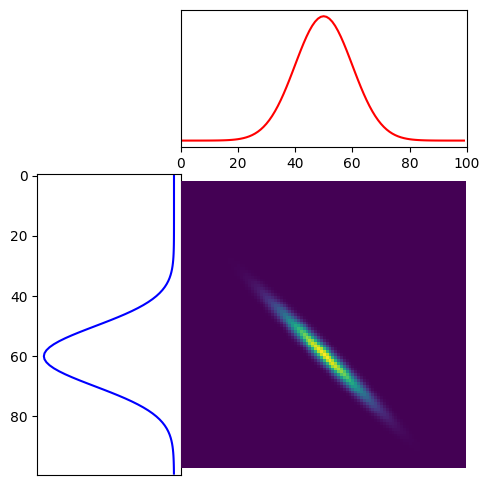

In [5]:
def sinkhorn(u, v, niter=1000, eps=1e-3, mode="naive"):
    n, m = len(u), len(v)
    psi = np.full((n,1), 1/n)
    phi = np.full((n,1), 1/n)
    P = np.zeros(shape=(n,n))

    def _cost(n, m):
        return np.array([
            abs(i-j)**2
            for i, j in product(range(n), range(m))
        ]).reshape((n,m))
    
    C = _cost(n, m)
    C = C / C.max().astype(np.float64)
    K = np.exp(-C/eps)
    print(C.shape, K.shape)
    
    
    cond, i = np.abs(np.einsum("ij->i", P) - v).sum(), 0
    while i < niter and cond > 1e-9:
        
        psi = v / np.dot(K, phi)
        phi = u / np.dot(K, psi)
        
        P = np.einsum("i,ij,j->ij", psi.reshape(-1), K, phi.reshape(-1))
        W = np.linalg.norm(
            np.dot(np.dot(K*C, phi), psi.T),
            ord="fro"
        )
        
        cond, i = np.abs(psi * np.dot(K, phi) - v).sum(), i+1
        
        if not i%100: print(f"iter {i} | loss {cond}")
    
    return P
    

P = sinkhorn(
    u.reshape((-1,1)), v.reshape((-1,1)), eps=1e-3)

import ot.plot
plt.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(
    v, u, P)

# TODO (Special Case): What if the target and source distribution sizes are different?

In [ ]:
phi = np.full((N,1), 1/N)
psi = np.full((N,1), 1/N)
p = np.zeros((N,1))
r = np.zeros((N,1))
q = np.zeros((N,1))
s = np.zeros((N,1))

h = 1
eps = 1e-2
l = np.exp(-h/eps)
print(-h/eps, l)

u = u.reshape((-1,1))
v = v.reshape((-1,1))

for e in range(5):
    r[0] = phi[0]
    s[N-1] = 0
    for i in range(N-1):
        r[i+1] = l * r[i] + phi[i+1]
        s[N-i-2] = l * (s[N-i-1] + phi[N-i-1])
    
#     print(v.shape, r.shape, s.shape)
    psi = v / (r+s)
#     print(psi)
    
#     print(p.shape, psi.shape)
    p[0] = psi[0]
    q[N-1] = 0
    for i in range(N-1):
        p[i+1] = l*p[i] + psi[i+1]
        q[N-i-2] = l * (q[N-i-1] + psi[N-i-1])

    phi = u / (p+q)
#     print(phi)
    KC = np.array([h * abs(i-j) * l **abs(i-j) for i,j in product(range(N), repeat=2)], dtype=np.float64).reshape((N,N))
#     print(KC)
    W = np.dot(np.dot(KC, phi).T, psi).squeeze(1)
    
    print(f"ep: {e} loss: {W}")
#     break